# Palmer Penguins

Para comenzar a analizar datos, lo primero que necesitamos son, precisamente, datos que analizar. Aunque cada conjunto de datos varía según el contexto de la investigación que lo generó, para aprender técnicas de análisis es común utilizar arreglos ya conocidos y diseñados para ser fáciles de explorar.

Ronald Fisher, considerado por muchos como el padre de la estadística moderna, desarrolló en 1936 un conjunto de datos multivariados conocido como Iris, que contiene información sobre tres especies de flores del género Iris. Este arreglo ha sido utilizado durante décadas como recurso introductorio para aprender análisis estadístico.

En 2020, Allison Marie Horst, Alison Presmanes Hill y Kristen B. Gorman publicaron un conjunto de datos con objetivos similares, pero esta vez basado en tres especies de pingüinos de las islas Palmer, en la Antártida {cite}`palmerpenguins2020`.

En esta unidad y la siguiente, utilizaremos este conjunto de datos para aprender a realizar análisis estadístico en Python.

**Referencias**
> Fisher, R. A. (1936). The use of multiple measurements in taxonomic problems. Annals of Eugenics, 7(2), 179–188.
> Horst, A. M., Hill, A. P., & Gorman, K. B. (2020). palmerpenguins: Data for Introductory Data Science. https://allisonhorst.github.io/palmerpenguins

## Ejercicio antes de continuar

:::{important}
Por favor revisa el repositorio oficial del dataset "Palmer Penguins" en la siguiente liga:
https://allisonhorst.github.io/palmerpenguins/

Aqui podrás conocer cómo está compuesto el `dataset` y qué significa cada dato. **Por favor no lo omitas.**
:::

## Importar el dataset

El arreglo de datos, en adelante `dataset` está disponible a travez de muchos paquetes y librerías en python, pero la forma más sencilla de importar los datos es por medio de una url.

:::{important}
Siempre verifica de dónde proviene la información antes de importar o instalar nada.
En este caso la URL es de un paquete de muy buena reputación `pingouin` que usaremos más adelante.
Pero en este momento no es necesario instalar.
:::

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/raphaelvallat/pingouin/refs/heads/main/src/pingouin/datasets/penguins.csv'

df = pd.read_csv(url)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Biscoe,37.8,18.3,174.0,3400.0,female
1,Adelie,Biscoe,37.7,18.7,180.0,3600.0,male
2,Adelie,Biscoe,35.9,19.2,189.0,3800.0,female
3,Adelie,Biscoe,38.2,18.1,185.0,3950.0,male
4,Adelie,Biscoe,38.8,17.2,180.0,3800.0,male
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,female


## Exploración inicial

Para explorar inicialmente el conjunto de datos, lo primero que queremos hacer es ver cómo está constuido.
Qué columnas tiene, qué tipos de datos son.
Los datasets que utilizaremos están en formato `tidy`, así que será fácil de analizar.

### Cabeza 
El primer paso en casi todos los flujos de trabajo es mostrar un pequeño encabezado para ver cómo son los datos.
Hicimos ya esto en la celda de código anterior, pero tenemos demasiados datos y puedes ver en medio de la tabla "..." significa que se recortaron muchas celdas.

La forma de mostrar un número controlado de filas es con el método `head`, como lo veremos a continuación.

In [2]:
df.head() # muestra las primeras 5 filas.

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Biscoe,37.8,18.3,174.0,3400.0,female
1,Adelie,Biscoe,37.7,18.7,180.0,3600.0,male
2,Adelie,Biscoe,35.9,19.2,189.0,3800.0,female
3,Adelie,Biscoe,38.2,18.1,185.0,3950.0,male
4,Adelie,Biscoe,38.8,17.2,180.0,3800.0,male


In [3]:
df.head(3) # es posible especificar el número de celdas a mostrar pasando un argumento.

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Biscoe,37.8,18.3,174.0,3400.0,female
1,Adelie,Biscoe,37.7,18.7,180.0,3600.0,male
2,Adelie,Biscoe,35.9,19.2,189.0,3800.0,female


### Información general

Posteriormente lo que haremos es obtener información general del arreglo de datos, para conocer qué tipo de datos están en cada columna. Solo al ver el encabezado con `head` podríamos no estar biendo todo, quizá los números son strings, o quizá haya datos faltantes.

El método `info` nos va a dar mucha información.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Si leemos con detenimiento el output veremos que el dataset contiene datos de 344 pingüinos, que están numerados del 0 al 343, además, tenemos 7 columnas. Podemos ver además que de esos 344 pingüinos, no tenemos los datos de todos, por ejemplo, solo tenemos el sexo de 333 individuos. 

En la última columna de `info` nos dicen el tipo de datos que tenemos. Todos los casos donde diga `object` quiere decir que la columna tiene datos `str`, es decir, es categórica nominal. Pandas tiene soporte para datos ordinales, pero eso se verá más adelante en el curso.

### Columnas

Puede ser que solo querramos ver el nombre de las columnas de nuestro dataset, y es fácil con el atributo `columns`.

In [16]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

### Descriptivos básicos

Como vimos en el tema previo, es muy sencillo utilizar el método `describe` para obtener descriptivos generales, pero si observas la siguiente celda, verás que solo está funcionando con los datos numéricos, faltan los nominales.

In [5]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Para obtener descriptivos para los tipo `object` necesitamos pedirlo explícitamente.

In [6]:
df.describe(include='object')

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,152,168,168


Nota que en esta ocasión solo obtuvimos los descriptivos para los tipo object y tenemos la cuenta, el número de categorías únicas (unique), la categoría más frecuente y su respectiva frecuencia.


### Distribuciones

Es igualmente sencillo, utilizando `pandas` obtener gráficos de distribuciones para las variables numércias.

array([[<Axes: title={'center': 'bill_length_mm'}>,
        <Axes: title={'center': 'bill_depth_mm'}>],
       [<Axes: title={'center': 'flipper_length_mm'}>,
        <Axes: title={'center': 'body_mass_g'}>]], dtype=object)

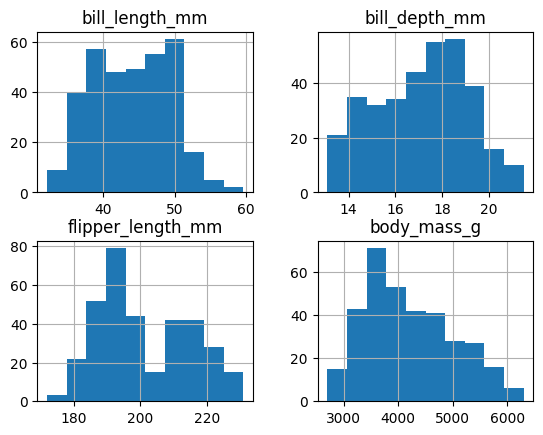

In [7]:
df.hist()

También es posible generar otro tipo de gráficos, aunque esto es conveniente, pandas no se especializa en visualizaciones, veremos en otra lección como utilizar librerías especialidadas para ese fin, por lo que no exploraremos más al respecto en este momento.

## Guardar los datos en forma local
Es posible guardar cualquier arreglo de datos cargado en pandas utilizando los métodos `to_`, por ejemplo, `to_csv`.

```python

df.to_csv('penguins.csv')

```

## Ejercicio
1. Utiliza el método que acabamos de discutir `df.to_csv('penguins.csv')` para guardar los datos en forma local.
2. Abre el archivo `penguins.csv` con tu programa de hojas de cálculo favorito:
    - Google Sheets
    - Microsoft Excel
    - Libre Office Calc
    - Mac OS numbers
    - Incluso SPSS, JASP, Jamovi
3. Utiliza el programa que elijas para explorar los datos como lo harías normalmente con una base de datos. Intenta conocer lo más posible sobre los pingüinos. Esto te facilitará mucho el aprendizaje en las siguientes lecciones.

